<a href="https://colab.research.google.com/github/zeynabkhorshidi/Binary-image/blob/main/Quantum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall -y qiskit qiskit-aer qiskit-terra
!pip install qiskit==0.39.5

Found existing installation: qiskit 0.39.5
Uninstalling qiskit-0.39.5:
  Successfully uninstalled qiskit-0.39.5
Found existing installation: qiskit-aer 0.11.2
Uninstalling qiskit-aer-0.11.2:
  Successfully uninstalled qiskit-aer-0.11.2
Found existing installation: qiskit-terra 0.22.4
Uninstalling qiskit-terra-0.22.4:
  Successfully uninstalled qiskit-terra-0.22.4
  Using cached qiskit-0.39.5-py3-none-any.whl
  Using cached qiskit_terra-0.22.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.5 kB)
  Using cached qiskit_aer-0.11.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
Using cached qiskit_aer-0.11.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.8 MB)
Using cached qiskit_terra-0.22.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.8 MB)


In [ ]:
import os
os.kill(os.getpid(), 9)

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import AerSimulator
print("Qiskit and AerSimulator imported successfully")

Qiskit and AerSimulator imported successfully


In [2]:
!pip install pyeda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.8/486.8 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyeda: filename=pyeda-0.29.0-cp311-cp311-linux_x86_64.whl size=625900 sha256=3ddd61af451ce08304f8781f690b9db55fdd7949682a6581a1dd1c90c1c24aff
  Stored in directory: /root/.cache/pip/wheels/0e/95/33/49ca56535609f00570aa1da4ec98297ec06828361c0a37051f
Successfully built pyeda


In [3]:
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from tabulate import tabulate
def test_fredkin(a, b, c):
    qc = QuantumCircuit(3)
    if a == 1:
        qc.x(0)
    if b == 1:
        qc.x(1)
    if c == 1:
        qc.x(2)
    qc.cswap(0, 1, 2)
    qc.measure_all()
    sampler = Sampler()
    result = sampler.run(qc).result()
    counts = result.quasi_dists[0]
    output = max(counts, key=counts.get)
    output_bin = format(int(output), '03b')[::-1]
    return output_bin
table = []
for a in [0,1]:
    for b in [0,1]:
        for c in [0,1]:
            output = test_fredkin(a, b, c)
            table.append([f"{a}{b}{c}", output])
print(tabulate(table, headers=["input (abc)", "outpot (q0q1q2)"], tablefmt="grid"))

+---------------+-------------------+
|   input (abc) |   outpot (q0q1q2) |
+===============+===================+
|           000 |               000 |
+---------------+-------------------+
|           001 |               001 |
+---------------+-------------------+
|           010 |               010 |
+---------------+-------------------+
|           011 |               011 |
+---------------+-------------------+
|           100 |               100 |
+---------------+-------------------+
|           101 |               110 |
+---------------+-------------------+
|           110 |               101 |
+---------------+-------------------+
|           111 |               111 |
+---------------+-------------------+


In [4]:
from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
import pandas as pd
def test_mkg(a, b, c, d):
    qc = QuantumCircuit(4)
    if a: qc.x(0)
    if b: qc.x(1)
    if c: qc.x(2)
    if d: qc.x(3)
    qc.cx(0, 3)
    qc.ccx(0, 1, 3)
    qc.swap(1, 2)
    qc.ccx(1, 2, 3)
    qc.cx(2, 3)
    qc.ccx(0, 2, 3)
    qc.cx(0, 3)
    qc.measure_all()
    sampler = Sampler()
    result = sampler.run(qc).result()
    counts = result.quasi_dists[0]
    return list(counts.keys())[0]
results = []
for a in [0, 1]:
    for b in [0, 1]:
        for c in [0, 1]:
            for d in [0, 1]:
                input_bin = f"{a}{b}{c}{d}"
                output_int = test_mkg(a, b, c, d)
                output_bin = f"{output_int:04b}"[::-1]  # q0q1q2q3
                results.append([input_bin, output_bin])
df = pd.DataFrame(results, columns=["input (abcd)", "outpot (q0q1q2q3)"])
print(df.to_markdown(index=False))

|   input (abcd) |   outpot (q0q1q2q3) |
|---------------:|--------------------:|
|           0000 |                0000 |
|           0001 |                0001 |
|           0010 |                0100 |
|           0011 |                0101 |
|           0100 |                0011 |
|           0101 |                0010 |
|           0110 |                0110 |
|           0111 |                0111 |
|           1000 |                1000 |
|           1001 |                1001 |
|           1010 |                1100 |
|           1011 |                1101 |
|           1100 |                1011 |
|           1101 |                1010 |
|           1110 |                1110 |
|           1111 |                1111 |


In [9]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import AerSimulator
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np

def run_custom_circuit(a, b, c):
    qc = QuantumCircuit(3, 3)

    # اعمال ورودی
    if a: qc.x(0)
    if b: qc.x(1)
    if c: qc.x(2)

    # گیت‌ها
    qc.ccx(0, 1, 2)
    qc.cx(0, 1)

    qc.measure([0,1,2], [0,1,2])
    return qc

simulator = AerSimulator()
table = []

# اجرا برای همه ورودی‌های 3 بیتی
for a in [0,1]:
    for b in [0,1]:
        for c in [0,1]:
            qc = run_custom_circuit(a, b, c)
            tqc = transpile(qc, simulator)
            result = simulator.run(tqc).result()
            counts = result.get_counts()
            output = max(counts, key=counts.get)
            table.append([f"{a}{b}{c}", output])

# جدول درستی
print(tabulate(table, headers=["input (abc)", "خروجی (q0q1q2)"], tablefmt="grid"))

+---------------+------------------+
|   input (abc) |   خروجی (q0q1q2) |
+===============+==================+
|           000 |              000 |
+---------------+------------------+
|           001 |              100 |
+---------------+------------------+
|           010 |              010 |
+---------------+------------------+
|           011 |              110 |
+---------------+------------------+
|           100 |              011 |
+---------------+------------------+
|           101 |              111 |
+---------------+------------------+
|           110 |              101 |
+---------------+------------------+
|           111 |              001 |
+---------------+------------------+


In [11]:
pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=be474501b05e9dcc44ddbfc13b228d752f8f64125e8c181ab8055b8545d4402e
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [15]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.circuit.library import U1Gate
import numpy as np
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
v_gate = U1Gate(np.pi / 2)
vdg_gate = U1Gate(-np.pi / 2)
cv_gate = v_gate.control()
cvdg_gate = vdg_gate.control()

sim = Aer.get_backend('aer_simulator')

results = []

print("input (abcd)    output (q0q1q2q3)")
print("---------------- ------------------")

for i in range(16):
    qc = QuantumCircuit(4, 4)

    bits = f"{i:04b}"
    for idx, bit in enumerate(reversed(bits)):
        if bit == '1':
            qc.x(idx)

    qc.append(cv_gate, [0, 3])
    qc.append(cv_gate, [1, 3])
    qc.append(cv_gate, [2, 3])
    qc.cx(0, 2)
    qc.cx(0, 2)
    qc.append(cvdg_gate, [2, 3])

    qc.measure(range(4), range(4))

    compiled = transpile(qc, sim)
    job = sim.run(compiled, shots=1)
    result = job.result()
    counts = result.get_counts()
    output = list(counts.keys())[0]

    print(f"      {bits}          {output}")

qc = QuantumCircuit(4, 4)
bits = '1111'
for idx, bit in enumerate(reversed(bits)):
    if bit == '1':
        qc.x(idx)

input (abcd)    output (q0q1q2q3)
---------------- ------------------
      0000          0000
      0001          0001
      0010          0010
      0011          0011
      0100          0100
      0101          0101
      0110          0110
      0111          0111
      1000          1000
      1001          1001
      1010          1010
      1011          1011
      1100          1100
      1101          1101
      1110          1110
      1111          1111


ورودی (abc)    خروجی (q0q1q2)
---------------- ----------------
      000          000
      001          101
      010          010
      011          111
      100          001
      101          100
      110          011
      111          110


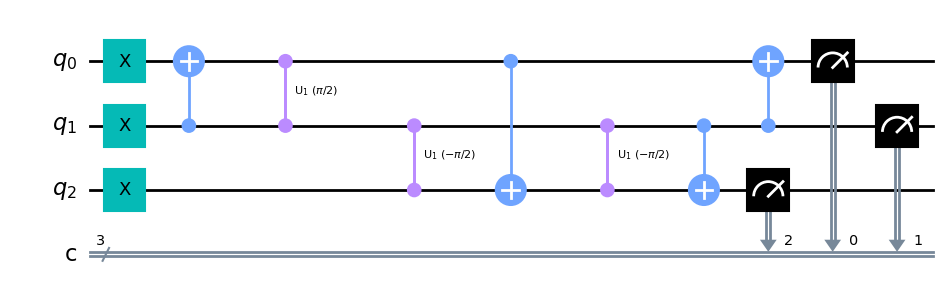

In [ ]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.circuit.library import U1Gate
import numpy as np

v_gate = U1Gate(np.pi / 2)
vdg_gate = U1Gate(-np.pi / 2)
cv_gate = v_gate.control()
cvdg_gate = vdg_gate.control()

sim = Aer.get_backend('aer_simulator')

print("input (abc)    output (q0q1q2)")
print("---------------- ----------------")

for i in range(8):
    qc = QuantumCircuit(3, 3)

    bits = f"{i:03b}"
    for idx, bit in enumerate(reversed(bits)):
        if bit == '1':
            qc.x(idx)

    qc.cx(1, 0)
    qc.append(cv_gate, [0, 1])
    qc.append(cvdg_gate, [2, 1])
    qc.cx(0, 2)
    qc.append(cvdg_gate, [2, 1])
    qc.cx(1, 2)
    qc.cx(1, 0)

    qc.measure(range(3), range(3))

    compiled = transpile(qc, sim)
    job = sim.run(compiled, shots=1)
    result = job.result()
    counts = result.get_counts()
    output = list(counts.keys())[0]

    output_display = output[::-1]

    print(f"      {bits}          {output_display}")

qc = QuantumCircuit(3, 3)
bits = '111'
for idx, bit in enumerate(reversed(bits)):
    if bit == '1':
        qc.x(idx)

qc.cx(1, 0)
qc.append(cv_gate, [0, 1])
qc.append(cvdg_gate, [2, 1])
qc.cx(0, 2)
qc.append(cvdg_gate, [2, 1])
qc.cx(1, 2)
qc.cx(1, 0)
qc.measure(range(3), range(3))

qc.draw(output='mpl')